In [4]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from trimkmeans.trimkmeans import TrimKMeans
import time
from sklearn.cluster import KMeans

In [6]:
benchmark_train, true_labels = make_blobs(n_samples=125000, centers=centers, random_state=42)
Benchmark_train = StandardScaler().fit_transform(benchmark_train)

In [4]:
trimkmeans = TrimKMeans(n_clusters=centers)
start_time = time.process_time()
trimkmeans.fit(Benchmark_train[:50000])
trimmed_first_time = round(time.process_time() - start_time, 2)

In [6]:
trimkmeans = TrimKMeans(n_clusters=centers)
start_time = time.process_time()
trimkmeans.fit(Benchmark_train[:75000])
trimmed_second_time = round(time.process_time() - start_time, 2)

In [8]:
trimkmeans = TrimKMeans(n_clusters=centers)
start_time = time.process_time()
trimkmeans.fit(Benchmarkd_train[:100000])
trimmed_third_time = round(time.process_time() - start_time, 2)

In [10]:
trimkmeans = TrimKMeans(n_clusters=centers)
start_time = time.process_time()
trimkmeans.fit(Benchmark_train)
trimmed_fourth_time = round(time.process_time() - start_time, 2)

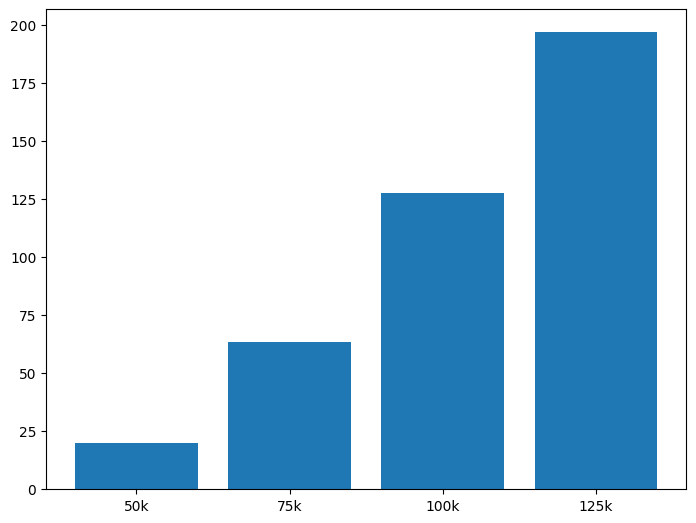

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
number_of_points = ['50k', '75k', '100k', '125k']
times = [trimmed_first_time, trimmed_second_time, trimmed_third_time, trimmed_fourth_time]
ax.bar(number_of_points, times)
plt.show()

In [13]:
start_time = time.process_time()
kmeans = KMeans(n_clusters=centers, random_state=42).fit(Benchmark_train[:50000])
kmeans_first_time = round(time.process_time() - start_time, 2)

start_time = time.process_time()
kmeans = KMeans(n_clusters=centers, random_state=42).fit(Benchmark_train[:75000])
kmeans_second_time = round(time.process_time() - start_time, 2)

start_time = time.process_time()
kmeans = KMeans(n_clusters=centers, random_state=42).fit(Benchmark_train[:100000])
kmeans_third_time = round(time.process_time() - start_time, 2)

start_time = time.process_time()
kmeans = KMeans(n_clusters=centers, random_state=42).fit(Benchmark_train)
kmeans_fourth_time = round(time.process_time() - start_time, 2)

In [7]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [15]:
%%R -i Benchmark_train,centers -o r_first_time,r_second_time,r_third_time,r_fourth_time

library(trimcluster)
start_time <- Sys.time()
tkm1 <- trimkmeans(Benchmark_train[1:50000,], k=centers, trim=0.1)
end_time <- Sys.time()
r_first_time <- end_time - start_time

start_time <- Sys.time()
tkm1 <- trimkmeans(Benchmark_train[1:75000,], k=centers, trim=0.1)
end_time <- Sys.time()
r_second_time <- end_time - start_time

start_time <- Sys.time()
tkm1 <- trimkmeans(Benchmark_train[1:100000,], k=centers, trim=0.1)
end_time <- Sys.time()
r_third_time <- end_time - start_time

start_time <- Sys.time()
tkm1 <- trimkmeans(Benchmark_train, k=centers, trim=0.1)
end_time <- Sys.time()
r_fourth_time <- end_time - start_time

Exception ignored from cffi callback <function _callback at 0x000001CC602FB880>:
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 330, in _callback
    callback()
  File "C:\Python310\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 319, in callback
    def callback() -> None:
KeyboardInterrupt: 


In [14]:
X = ['50k', '100k', '200k', '300k']
trimmed_times = [trimmed_first_time, trimmed_second_time, trimmed_third_time, trimmed_fourth_time]
kmeans_times = [kmeans_first_time, kmeans_second_time, kmeans_third_time, kmeans_fourth_time]
r_times = [r_first_time, r_second_time, r_third_time, r_fourth_time]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.3, trimmed_times, 0.4, label = 'Python trimmed KMeans')
plt.bar(X_axis, kmeans_times, 0.4, label = 'Python KMeans')
plt.bar(X_axis + 0.3, r_times, 0.4, label = 'R trimmed KMeans')
  
plt.xticks(X_axis, X)
plt.xlabel("Implementation")
plt.ylabel("Number of Points")
plt.title("Runtime comparison")
plt.legend()
plt.show()

NameError: name 'trimmed_first_time' is not defined